**Credit Card Fraud Detection**

The dataset used here has been downloaded from kaggle and presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Import the Dataset

In [2]:
dataset = pd.read_csv('creditcard.csv')
print(dataset["Class"].value_counts())
#Resampling the dataset by considering only the first 20,000 transactions
dataset_20000 = dataset[:20000]
print(dataset_20000["Class"].value_counts())
X = dataset_20000.iloc[:, :-1].values
y = dataset_20000.iloc[:, -1].values
y = y.reshape(len(y),1)


0    284315
1       492
Name: Class, dtype: int64
0    19915
1       85
Name: Class, dtype: int64


Taking Care of the missing values

In [3]:
from sklearn.impute import SimpleImputer
imputer_X = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_Y = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_X.fit(X)
imputer_Y.fit(y)
X = imputer_X.transform(X)
y = imputer_Y.transform(y)

Splitting the dataset

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape)

(16000, 30) (4000, 30)


Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

Finding out the best K value Using the K-Fold cross validator

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

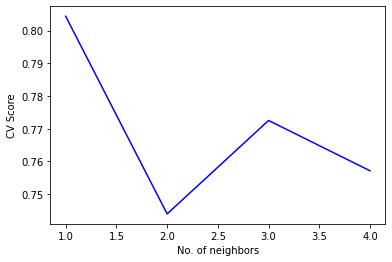

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
cv_score = []
for i in range(1,6):
  KNN = KNeighborsClassifier(n_neighbors=i)
  validator = cross_val_score(estimator=KNN, X=X_train, y=y_train, cv=5, scoring='recall')
  cv_score.append(validator.mean())

plt.plot(range(1,6), cv_score, color='blue')
plt.xlabel("No. of neighbors")
plt.ylabel("CV Score")
plt.show()

From the graph it is clear that the best CV Score is achieved for K = 1. 

Training the Model

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Testing the Model 

In [11]:
y_pred = classifier.predict(sc.transform(X_test))
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test), 1)), axis=1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


Confusion Matrix and Accuracy Score

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score
cf = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)
print(cf)
print('Accuracy Score score: {0:0.2f}'.format(
      ac*100))
print('F1 score: {0:0.2f}'.format(
      f1*100))
print('Recall score: {0:0.2f}'.format(
      rs*100))

[[3979    3]
 [   3   15]]
Accuracy Score score: 99.85
F1 score: 83.33
Recall score: 83.33


As this is a highly imbalanced dataset we cannot rely on the accuracy score alone and will make use of other metrics such as Average Precision Score and F1 Score.

Computing the average precision score

In [17]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision*100))

0.6951944444444446
Average precision-recall score: 69.52


Plotting the precision recall curve

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.70')

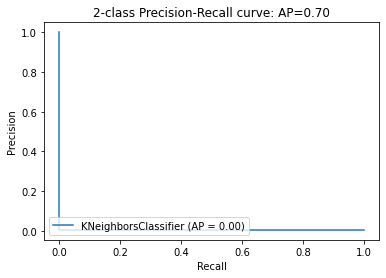

In [15]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))